In [1]:
    import numpy as np
    import pandas as pd
    import sklearn
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from scipy.stats import zscore
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import PowerTransformer
    from sklearn.model_selection import cross_val_score
    import joblib
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cip",sep=",")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Above details shows the  dataset being imported

In [3]:
pd.set_option("display.max_rows",None)

The above code is used to show the whole details

In [ ]:
df

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

All columns in dataset

In [6]:
df=pd.DataFrame(data=df)

In [7]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We have both object and integer type values in all columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Shows number of rows,null values and datatypes

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see there are no null values in any columns

<AxesSubplot:>

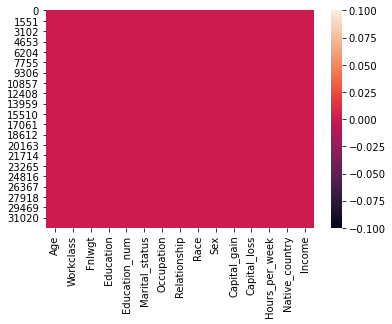

In [11]:
sns.heatmap(df.isnull())

The above heat map shows there are no null values

In [12]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The above data shows standard devation,Mean,Count,25%percentile,50%percentile,75%percentile,minimum value and maximum value

In [13]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

We can see there are two types of values in target variable

In [14]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Total number of Income <=50k and >=50k values in target variable

<AxesSubplot:xlabel='Income', ylabel='count'>

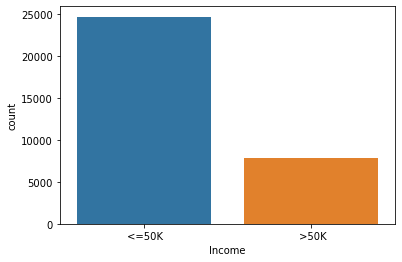

In [15]:
sns.countplot(df["Income"])

we have 2 classes and are not eqalily distributed,there is class imbalance issue 

<AxesSubplot:>

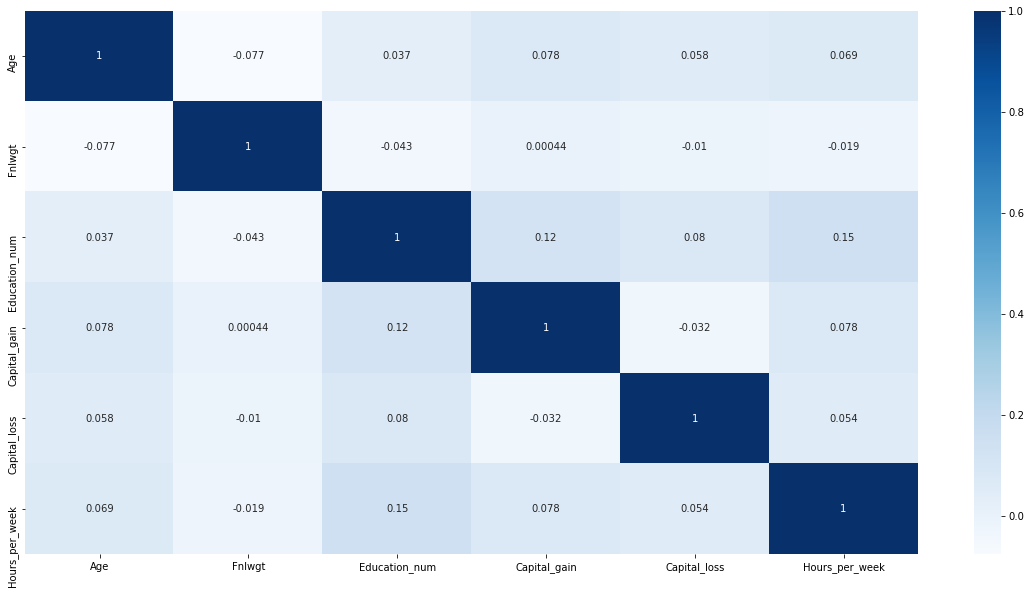

In [16]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

    This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

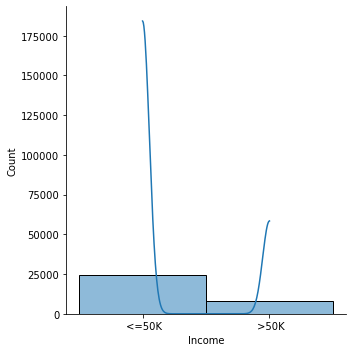

In [17]:
 sns.displot(df["Income"],bins=20,kde=True)

The above distribution plot for Income

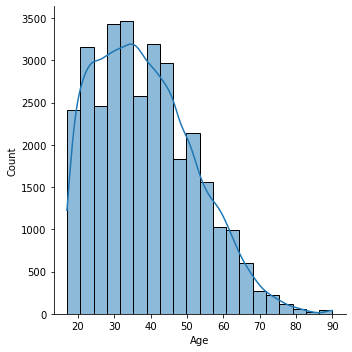

In [18]:
 sns.displot(df["Age"],bins=20,kde=True)

The above distribution plot for Age

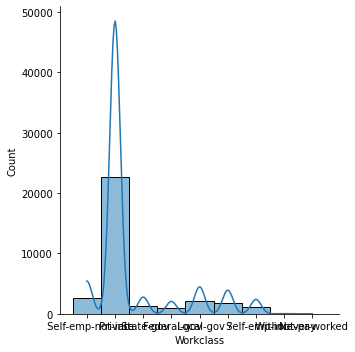

In [19]:
 sns.displot(df["Workclass"],bins=20,kde=True)

The above distribution plot for Workclass

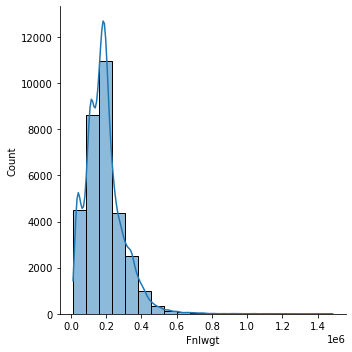

In [20]:
 sns.displot(df["Fnlwgt"],bins=20,kde=True)

The above distribution plot for Fnlwgt

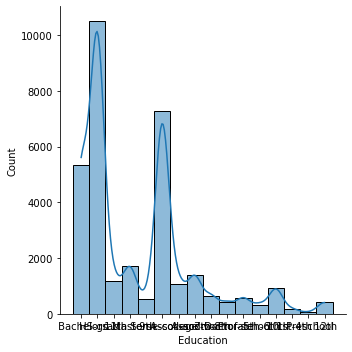

In [21]:
 sns.displot(df["Education"],bins=20,kde=True)

The above distribution plot for Education

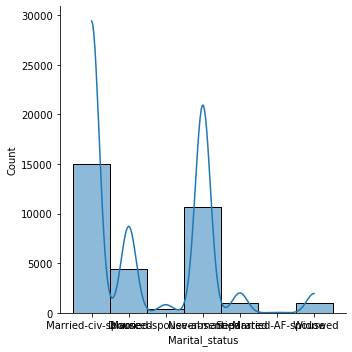

In [22]:
 sns.displot(df["Marital_status"],bins=20,kde=True)

The above distribution plot for Marital_status

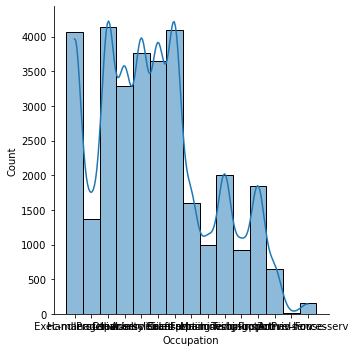

In [23]:
 sns.displot(df["Occupation"],bins=5,kde=True)

The above distribution plot for Occupation

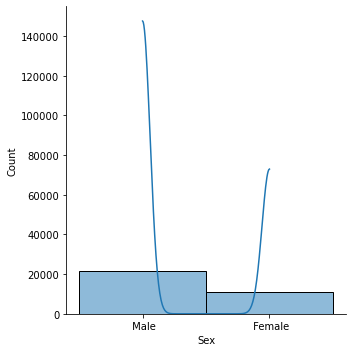

In [24]:
 sns.displot(df["Sex"],bins=5,kde=True)

The above distribution plot for Sex

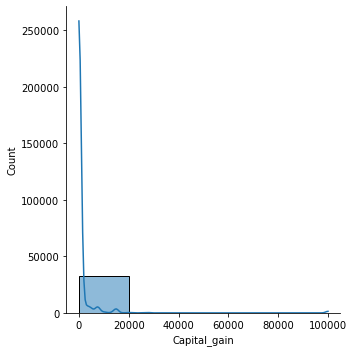

In [25]:
 sns.displot(df["Capital_gain"],bins=5,kde=True)

The above distribution plot for Capital_gain

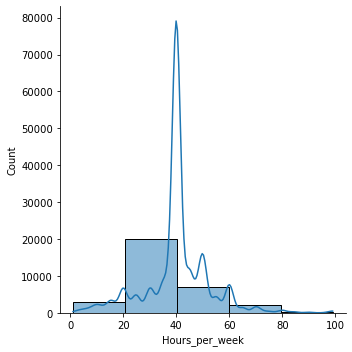

In [26]:
 sns.displot(df["Hours_per_week"],bins=5,kde=True)

The above distribution plot for Hours_per_week

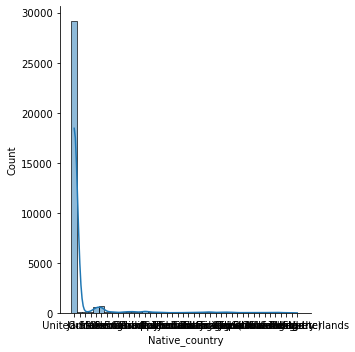

In [27]:
 sns.displot(df["Native_country"],bins=5,kde=True)

The above distribution plot for Native_country

<AxesSubplot:xlabel='count', ylabel='Workclass'>

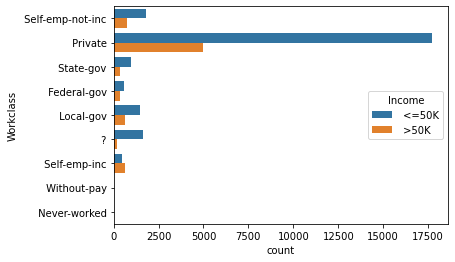

In [28]:
sns.countplot(y=df['Workclass'], hue=df['Income'])

This shows the count plot for Workclass and Income. 

<AxesSubplot:xlabel='count', ylabel='Sex'>

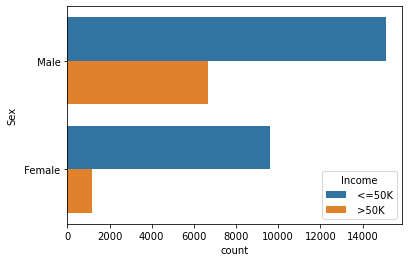

In [29]:
sns.countplot(y=df['Sex'], hue=df['Income'])

This shows the count plot for Sex and Income. 

<AxesSubplot:xlabel='count', ylabel='Race'>

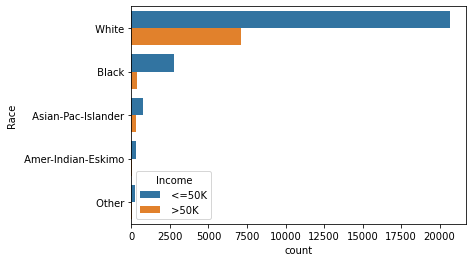

In [30]:
sns.countplot(y=df['Race'], hue=df['Income'])

This shows the count plot for Race and Income. 

<AxesSubplot:xlabel='count', ylabel='Education'>

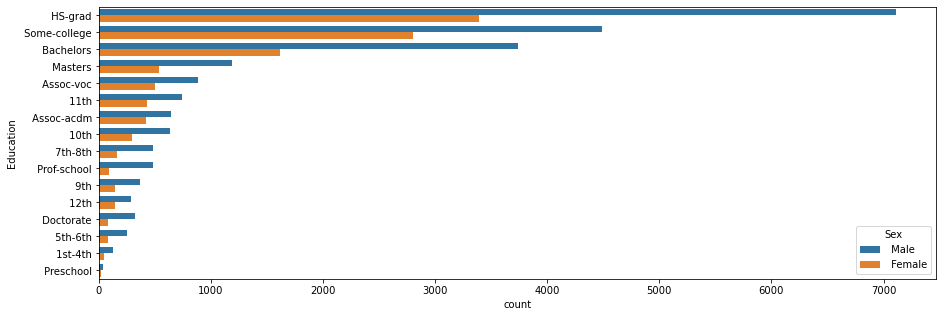

In [31]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['Education'], hue=df['Sex'], order = df['Education'].value_counts().index)

This shows the count plot for Education and Sex. 

<AxesSubplot:xlabel='count', ylabel='Relationship'>

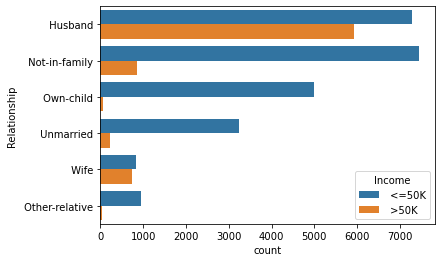

In [32]:
sns.countplot(y=df['Relationship'], hue=df['Income'], order = df['Relationship'].value_counts().index)

This shows the count plot for Relationship and Income. 

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

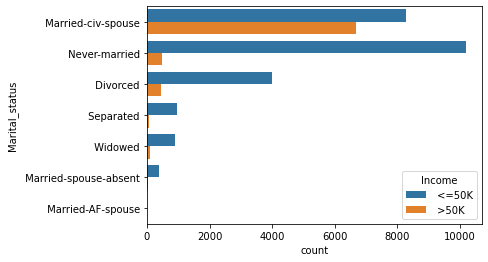

In [33]:
sns.countplot(y=df['Marital_status'], hue=df['Income'], order = df['Marital_status'].value_counts().index)

This shows the count plot for Marital_status and Income. 

<AxesSubplot:xlabel='count', ylabel='Education'>

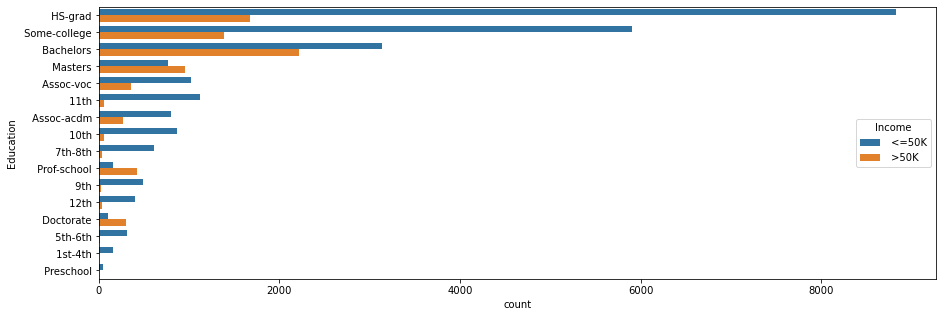

In [34]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['Education'], hue=df['Income'], order = df['Education'].value_counts().index)

This shows the count plot for Education and Income. 

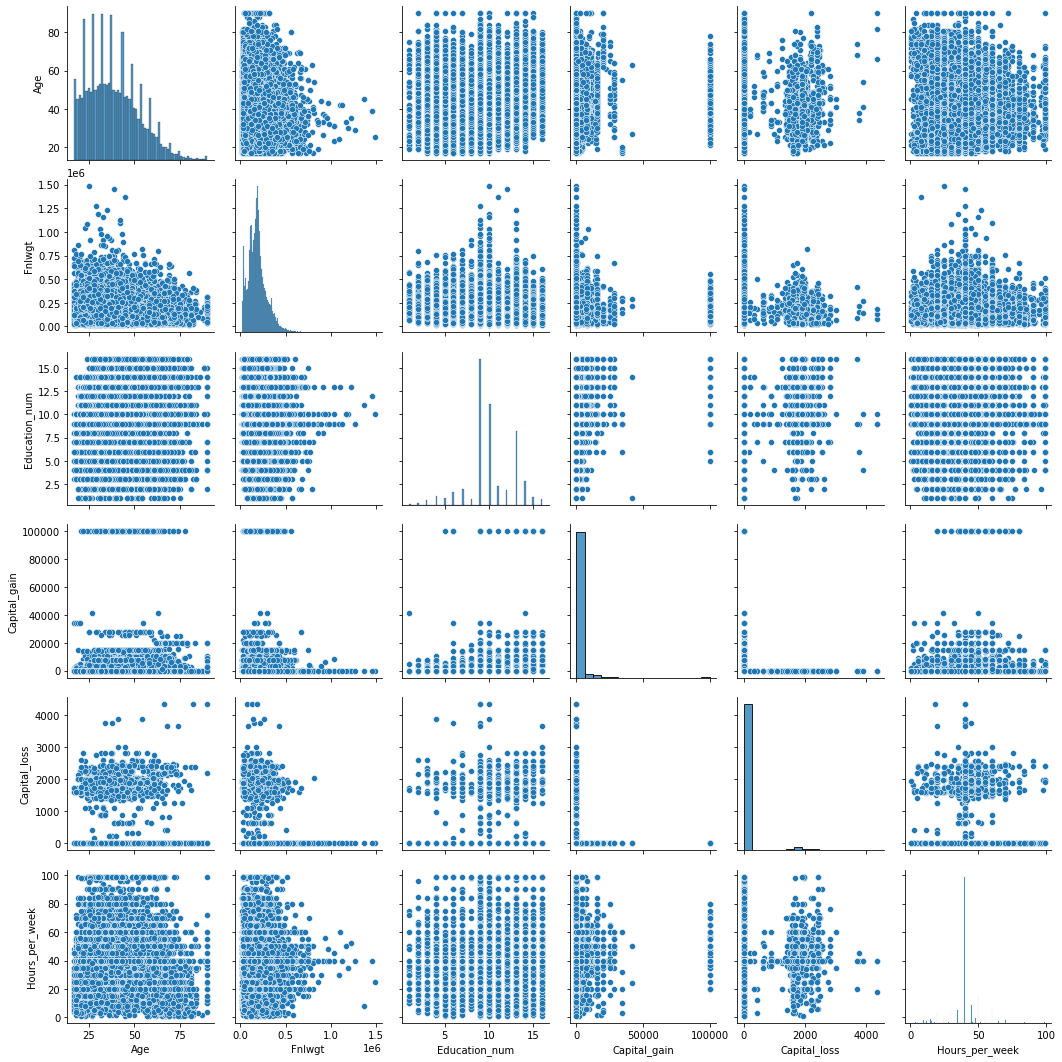

In [35]:
sns.pairplot(df)

The above details show the pair plot with respect to target variable

In [36]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Unique values in workclass column

In [37]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Unique values in Education column

In [38]:
df["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Unique values in Marital_status column

In [39]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Unique values in Occupation column

In [40]:
df["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

Unique values in Relationship column

In [41]:
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

Unique values in Race column

In [42]:
df["Sex"].unique()

array([' Male', ' Female'], dtype=object)

Unique values in Sex column

In [43]:
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

As we have many unique values of Native_country column so we will store its count in a dictonary and then map it on the dataset

In [44]:
native=df["Native_country"].value_counts().to_dict()

In [45]:
df["Native_country"]=df["Native_country"].map(native)

In [46]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,29169,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,29169,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,29169,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,95,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,29169,<=50K


# Ordinal Encoding

In [47]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [48]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [49]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,29169,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,29169,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,29169,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,95,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,29169,0.0


In [50]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country      int64
Income            float64
dtype: object

As we can see all columns are conveted into integer and float datatype

<AxesSubplot:>

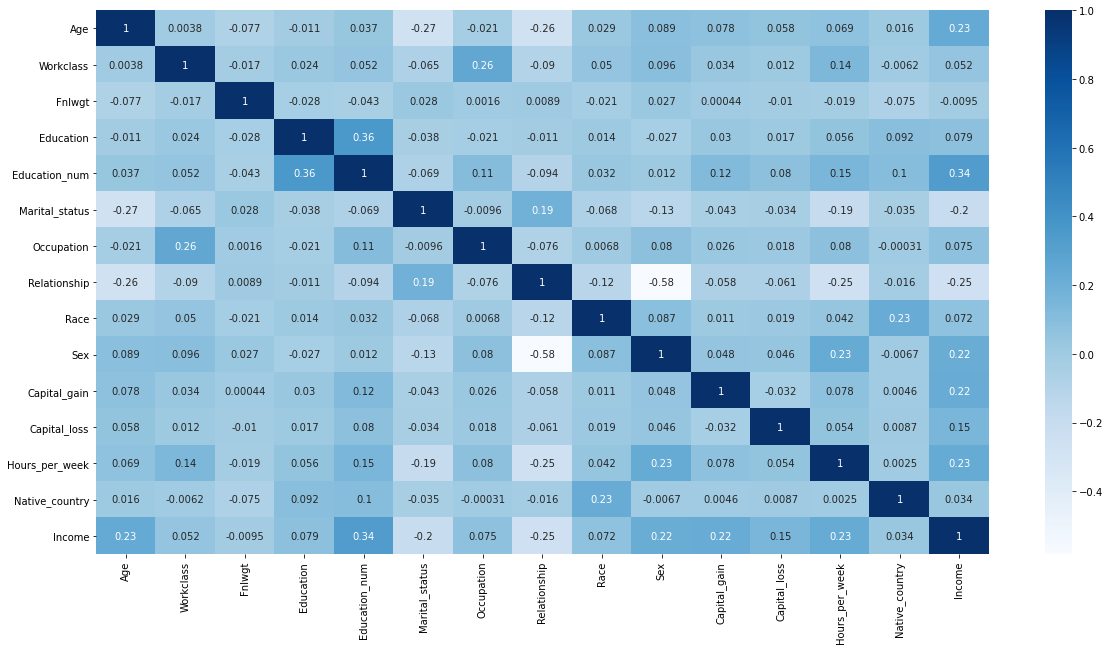

In [51]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

    This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

In [52]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -2.592490
Income             1.212383
dtype: float64

As we see skewness is not in the range -0.50 and +0.50

# Zscore for removing outliers

In [53]:
from scipy.stats import zscore

zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([    9,    10,    13, ..., 32532, 32550, 32552], dtype=int64), array([12,  8,  8, ...,  8,  8,  8], dtype=int64))


In [54]:
print("shape before removing the outliers",df.shape)
df_new=df[(zscr<3).all(axis=1)]
print("shape after removing the outliers",df_new.shape)

shape before removing the outliers (32560, 15)
shape after removing the outliers (28590, 15)


In [55]:
Dataloss=((32560-28590)/32560)*100
Dataloss

12.192874692874692

In [56]:
df_new.skew()

Age                0.484901
Workclass         -0.749412
Fnlwgt             0.625539
Education         -0.944501
Education_num     -0.164951
Marital_status    -0.045806
Occupation         0.124509
Relationship       0.750938
Race              -2.581170
Sex               -0.683236
Capital_gain       4.943299
Capital_loss      29.511376
Hours_per_week    -0.358307
Native_country    -3.077119
Income             1.326996
dtype: float64

# Seperating columns into Independent variables and target variables

In [57]:
x=df_new.drop("Income",axis=1)
y=df_new[["Income"]]

# Power transformation Method

In [58]:
from sklearn.preprocessing import power_transform
df_new2=power_transform(x)

df_new2=pd.DataFrame(df_new2,columns=x.columns)

In [59]:
df_new2.skew()

Age               -0.018004
Workclass          0.076281
Fnlwgt            -0.033714
Education         -0.313598
Education_num      0.025018
Marital_status    -0.128008
Occupation        -0.184420
Relationship       0.107736
Race              -2.508560
Sex               -0.683236
Capital_gain       3.069711
Capital_loss      24.871435
Hours_per_week     0.105522
Native_country    -3.076608
dtype: float64

In [60]:
df_new2.shape

(28590, 14)

# Standard Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new2)
x=pd.DataFrame(x,columns=df_new2.columns)

In [83]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.922479,1.662006,-1.133593,-0.481228,1.224794,-0.386975,-0.493955,-1.109963,0.349866,0.715136,-0.297037,-0.040144,-2.215123,0.296479
1,0.126028,0.016560,0.407987,0.084891,-0.456460,-1.762487,-0.004772,0.101671,0.349866,0.715136,-0.297037,-0.040144,-0.038854,0.296479
2,1.097259,0.016560,0.588846,-2.067606,-1.244752,-0.386975,-0.004772,-1.109963,-2.862097,0.715136,-0.297037,-0.040144,-0.038854,0.296479
3,-0.709546,0.016560,1.474491,-0.481228,1.224794,-0.386975,0.833855,1.548979,-2.862097,-1.398336,-0.297037,-0.040144,-0.038854,-3.373064
4,0.050954,0.016560,1.032789,0.388819,1.663734,-0.386975,-0.493955,1.548979,0.349866,-1.398336,-0.297037,-0.040144,-0.038854,0.296479


# Train test split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22300, 14)
(6290, 14)
(22300, 1)
(6290, 1)


# Logistic Regression

In [64]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8217806041335453
[[4589  285]
 [ 836  580]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      4874
         1.0       0.67      0.41      0.51      1416

    accuracy                           0.82      6290
   macro avg       0.76      0.68      0.70      6290
weighted avg       0.81      0.82      0.81      6290



# GaussianNB and its accuracy score

In [65]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score :
0.751510333863275
[[3625 1249]
 [ 314 1102]]
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      4874
         1.0       0.47      0.78      0.59      1416

    accuracy                           0.75      6290
   macro avg       0.69      0.76      0.70      6290
weighted avg       0.82      0.75      0.77      6290



# Support Vector Classifier

In [66]:
sv=SVC()
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.8324324324324325
[[4598  276]
 [ 778  638]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      4874
         1.0       0.70      0.45      0.55      1416

    accuracy                           0.83      6290
   macro avg       0.78      0.70      0.72      6290
weighted avg       0.82      0.83      0.82      6290



# Decision Tree Classifier

In [67]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score :
0.805087440381558
[[4256  618]
 [ 608  808]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      4874
         1.0       0.57      0.57      0.57      1416

    accuracy                           0.81      6290
   macro avg       0.72      0.72      0.72      6290
weighted avg       0.81      0.81      0.81      6290



# KNeighbors Classifier

In [68]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy score :
0.8186009538950716
[[4377  497]
 [ 644  772]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      4874
         1.0       0.61      0.55      0.58      1416

    accuracy                           0.82      6290
   macro avg       0.74      0.72      0.73      6290
weighted avg       0.81      0.82      0.81      6290



# Support vector classifier with different kernel

In [69]:
sv=SVC(kernel="poly")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.831637519872814
[[4595  279]
 [ 780  636]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90      4874
         1.0       0.70      0.45      0.55      1416

    accuracy                           0.83      6290
   macro avg       0.77      0.70      0.72      6290
weighted avg       0.82      0.83      0.82      6290



In [70]:
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.8324324324324325
[[4598  276]
 [ 778  638]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      4874
         1.0       0.70      0.45      0.55      1416

    accuracy                           0.83      6290
   macro avg       0.78      0.70      0.72      6290
weighted avg       0.82      0.83      0.82      6290



# Ensemble Methods using Random forest and Ada booster

In [71]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy score :
0.8484896661367249
[[4543  331]
 [ 622  794]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4874
         1.0       0.71      0.56      0.62      1416

    accuracy                           0.85      6290
   macro avg       0.79      0.75      0.77      6290
weighted avg       0.84      0.85      0.84      6290



In [72]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

accuracy score :
0.8531001589825119
[[4606  268]
 [ 656  760]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      4874
         1.0       0.74      0.54      0.62      1416

    accuracy                           0.85      6290
   macro avg       0.81      0.74      0.77      6290
weighted avg       0.84      0.85      0.84      6290



In [73]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

Income
1.0       22198
0.0       22198
dtype: int64

We can see now the target variable is equally distributed

# Cross validation method

In [74]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.82318993 0.8324589  0.83018538 0.83071004 0.8273872 ]
0.8287862889122068


In [75]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.83490731 0.83927947 0.84085345 0.84050367 0.83543197]
0.8381951731374606


In [76]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.810773   0.79940539 0.80779993 0.81654425 0.80500175]
0.8079048618398043


In [77]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.82493879 0.81444561 0.82406436 0.82703743 0.82563834]
0.8232249038125218


In [78]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.85414481 0.85099685 0.85362015 0.85746765 0.85624344]
0.8544945785239595


In [79]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.85449458 0.85711787 0.86044071 0.8644631  0.8593914 ]
0.8591815320041972


# Saving the best model accuracy

In [80]:
import pickle
filename="cip.pkl"
pickle.dump(ad,open(filename,"wb"))

# Conclusion

In [81]:
loaded_model=pickle.load(open("cip.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.8531001589825119


In [82]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,6280,6281,6282,6283,6284,6285,6286,6287,6288,6289
Predicted,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Original,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
